# <span style='color:blue'> Seeds Project </span>

## Domain
Agriculture; used for practice of classification concepts in Python

## Problem Statement
We will train a classification model with a seven-dimension measurement.

## Metric
We will use accuracy to assess the performance of the model

## Data Summary
n: 210
p: 7

*Attributes: *
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove.


*Wheat Types:* <br>
Kama [1] <br>
Rosa [2] <br>
Canadian [3]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
Seeds_Data = pd.read_csv(SEEDS_DATA_URL, sep='', delimiter=r"\s+",header=None)
Seeds_Data.columns = ['area','perimeter','compactness','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove','category']
Seeds_Data

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,category
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


In [3]:
Seeds_Data.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,category
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


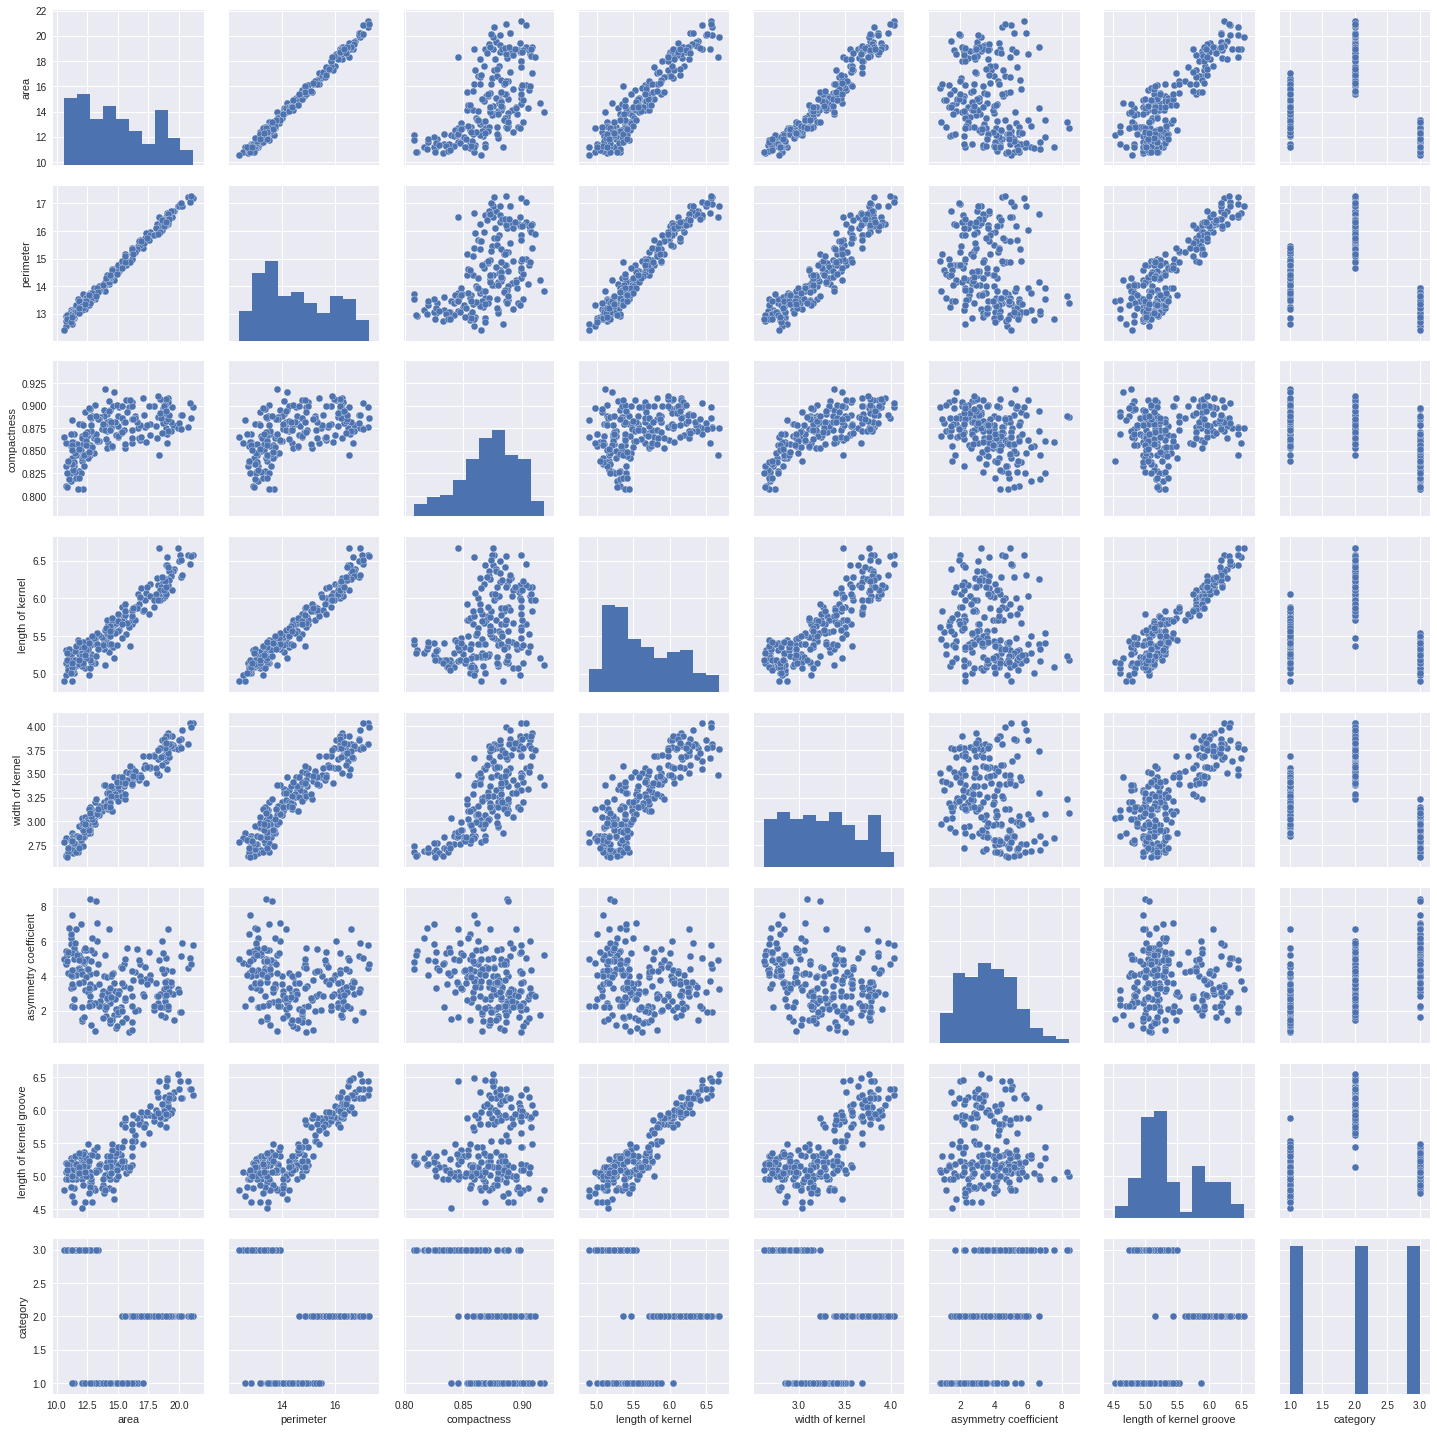

In [4]:
sns.pairplot(Seeds_Data)

<br>
## Observations

The following features seem to have a strong linear correlation with each other:
- area and perimeter/width of kernel/length of kernel/length of kernel groove
- perimeter and width of kernel/length of kernel/length of kernel groove
- width of kernel and length of kernel
- length of kernel groove and length of kernel groove

The following seem to seperate the types of wheat pretty well:
- area
- perimeter
- length/width of kernel
- length of kernel groove

<br>
<br>
## Plan

Classification via usage of ...
<br>
<br>

In [6]:
#BIC Function
from sklearn.metrics import log_loss
def BIC(log_reg_model,data,target):
    n=data.shape[0]
    p=data.shape[1]
    complexity=log(n)*(p+1)
    pred=lrm.predict(data)
    likelihood=-2*log_loss(target,pred)
    return complexity_likelihood